# Campaña de Marketing Bancario - EDA

In [3]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Obtener las dimensiones
total_data.shape

(41188, 21)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Se puede observar arriba que ninguna de las columnas contiene valores Nan.

Asimismo, nos informa de lo siguiente:
- Hay 11 características categóricas (job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome y y).

- Y 10 características numéricas (age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m y nr.employed).

In [6]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#Eliminar información irrelevante

total_data.drop(["previous", "contact", "month", "day_of_week", "duration"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


/tmp/ipykernel_685/2458246395.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_685/2458246395.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


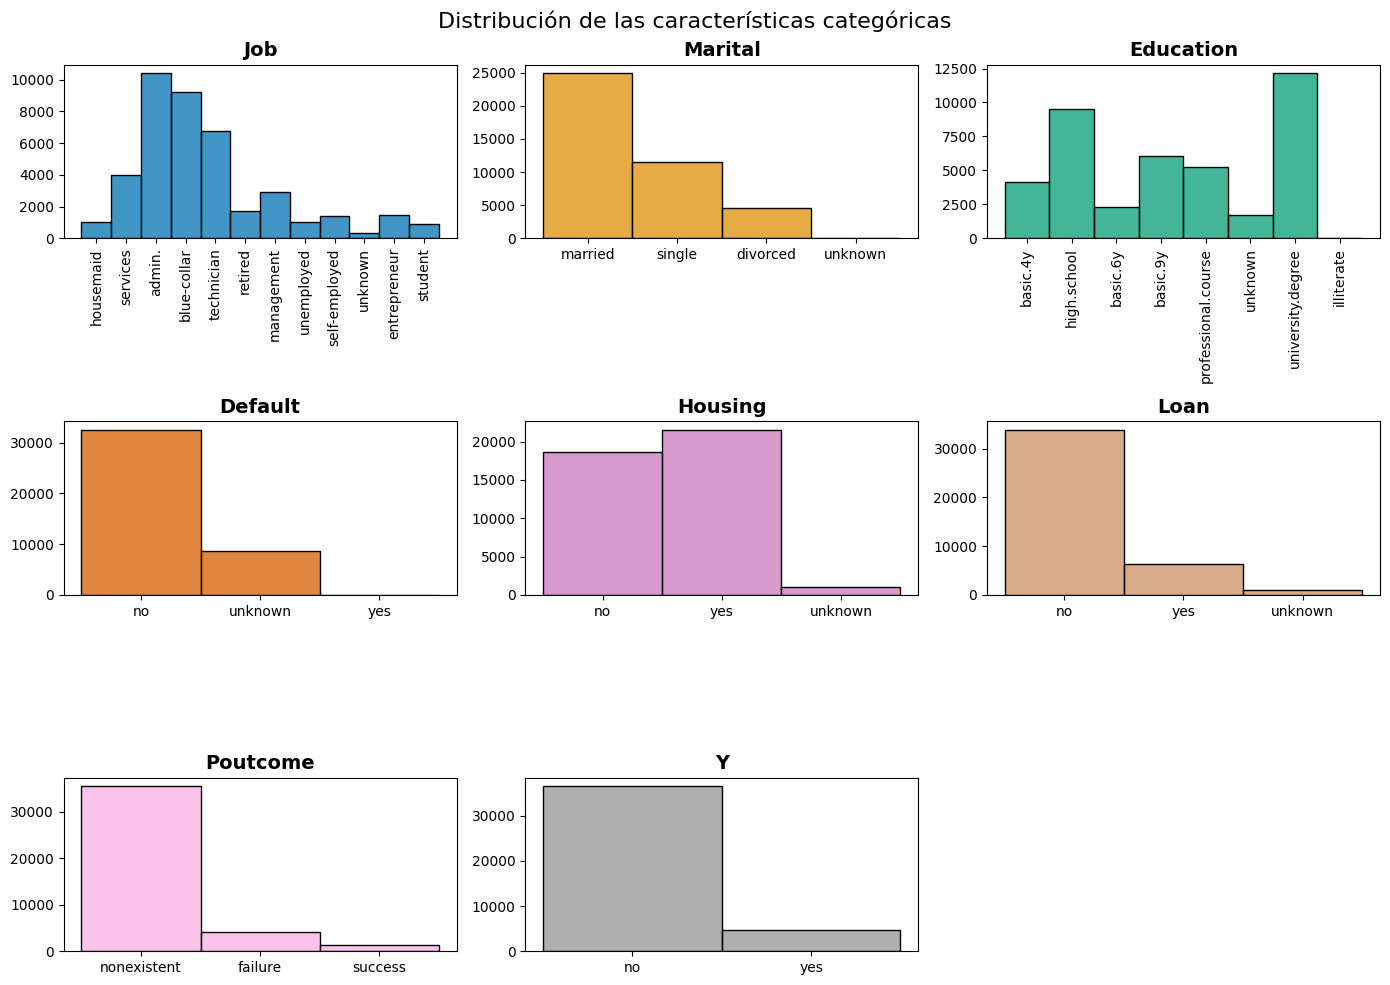

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle("Distribución de las características categóricas", fontsize=16)

categorias = [
    ("job", 0, 0),
    ("marital", 0, 1),
    ("education", 0, 2),
    ("default", 1, 0),
    ("housing", 1, 1),
    ("loan", 1,2),
    ("poutcome", 2,0),
    ("y", 2, 1),
]
colores = sns.color_palette("colorblind")

for i, (col, row, col_pos) in enumerate(categorias):
    ax = axis[row, col_pos]
    sns.histplot(data=total_data, x=col, ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=14, fontweight='bold')
    
    if col in ["job", "education"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

#Analisis

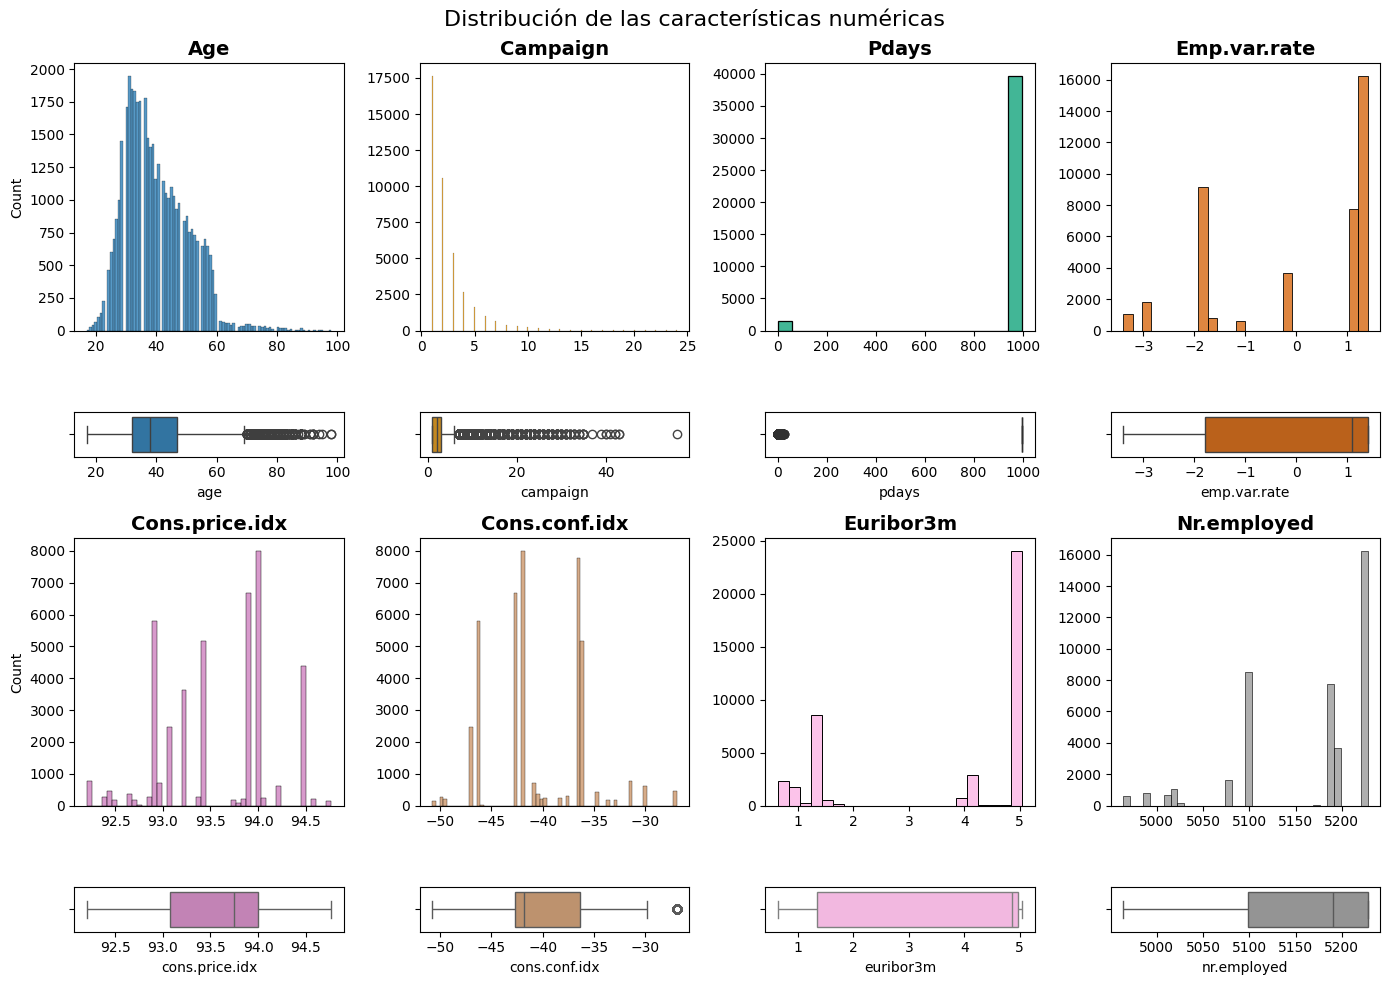

In [9]:
#Analisis con histogramas y boxplot de las características numéricas

fig, axis = plt.subplots(4, 4, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data[total_data["campaign"] < 25], x = "campaign", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "campaign", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = total_data, x = "pdays", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "pdays", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = total_data, x = "emp.var.rate", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "emp.var.rate", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = total_data, x = "cons.price.idx", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "cons.price.idx", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = total_data, x = "cons.conf.idx", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "cons.conf.idx", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = total_data, x = "euribor3m", color=sns.color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "euribor3m", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = total_data, x = "nr.employed", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = total_data, x = "nr.employed", color=sns.color_palette("colorblind")[7])

axis[0, 0].set_title("Age", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Campaign", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Pdays", fontsize=14, fontweight='bold')
axis[0, 3].set_title("Emp.var.rate", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Cons.price.idx", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Cons.conf.idx", fontsize=14, fontweight='bold')
axis[2, 2].set_title("Euribor3m", fontsize=14, fontweight='bold')
axis[2, 3].set_title("Nr.employed", fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

#Analisis

/tmp/ipykernel_685/636096319.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=90, fontsize=8)
/tmp/ipykernel_685/636096319.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=90, fontsize=8)


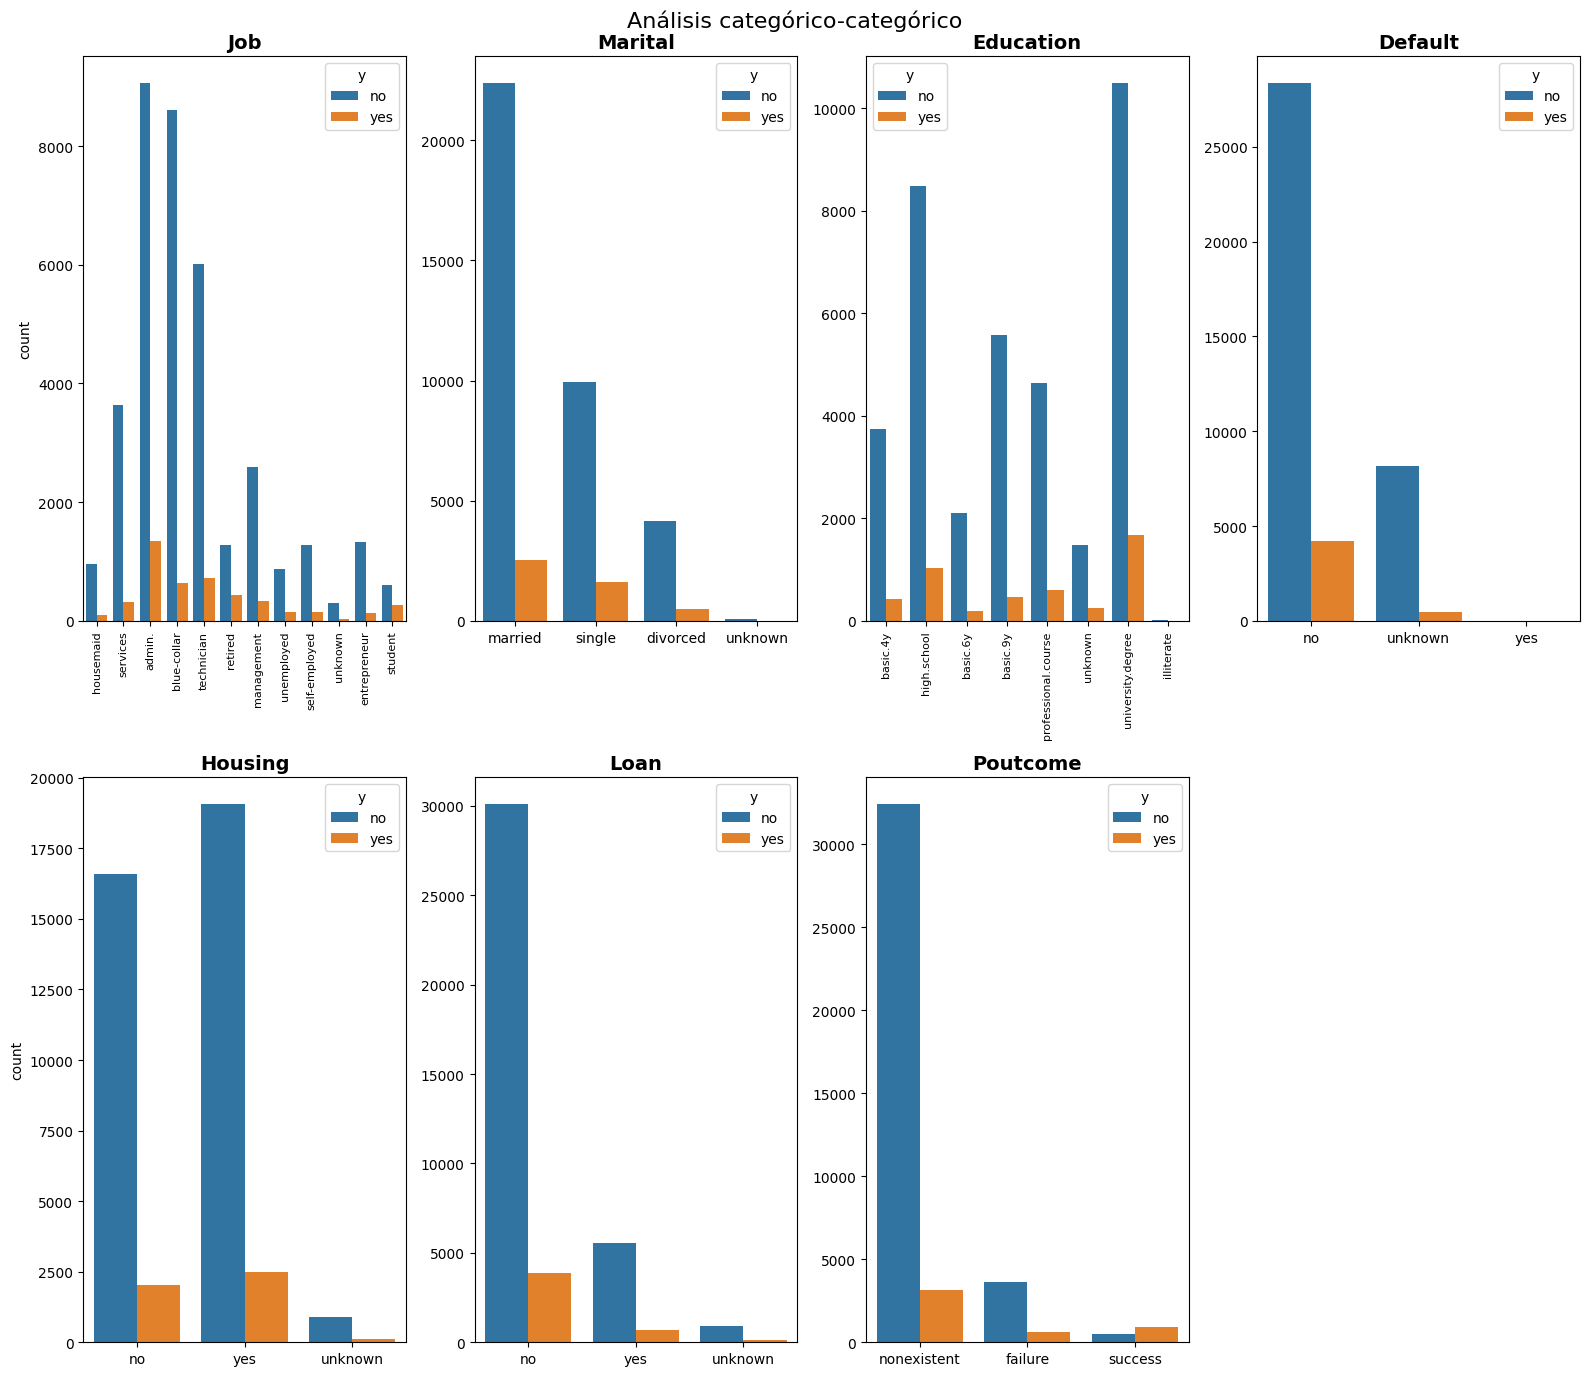

In [10]:
#Analisis de varias variables, pt.2

fig, axis = plt.subplots(2, 4, figsize = (16, 14))
fig.suptitle("Análisis categórico-categórico", fontsize=16)

sns.countplot(ax = axis[0, 0], data = total_data, x="job", hue = "y").set(xlabel= None)
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=90, fontsize=8)
sns.countplot(ax = axis[0, 1], data = total_data, x="marital", hue = "y").set(xlabel= None, ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x="education", hue = "y").set(xlabel= None, ylabel = None)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=90, fontsize=8)
sns.countplot(ax = axis[0, 3], data = total_data, x="default", hue = "y").set(xlabel= None, ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x="housing", hue = "y").set(xlabel= None)
sns.countplot(ax = axis[1, 1], data = total_data, x="loan", hue = "y").set(xlabel= None, ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_data, x="poutcome", hue = "y").set(xlabel= None, ylabel = None)

axis[0, 0].set_title("Job", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Marital", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Education", fontsize=14, fontweight='bold')
axis[0, 3].set_title("Default", fontsize=14, fontweight='bold')
axis[1, 0].set_title("Housing", fontsize=14, fontweight='bold')
axis[1, 1].set_title("Loan", fontsize=14, fontweight='bold')
axis[1, 2].set_title("Poutcome", fontsize=14, fontweight='bold')

fig.delaxes(axis[1, 3])

plt.tight_layout()
plt.show()


#Analisis

In [18]:
import json

factorize = pd.factorize(total_data["job"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_job.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["job_n"] = factorize[0]

factorize = pd.factorize(total_data["marital"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_marital.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["marital_n"] = factorize[0]

factorize = pd.factorize(total_data["education"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_education.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["education_n"] = factorize[0]

factorize = pd.factorize(total_data["default"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_default.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["default_n"] = factorize[0]

factorize = pd.factorize(total_data["housing"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_housing.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["housing_n"] = factorize[0]

factorize = pd.factorize(total_data["housing"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_housing.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["housing_n"] = factorize[0]

factorize = pd.factorize(total_data["loan"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_loan.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["loan_n"] = factorize[0]

factorize = pd.factorize(total_data["poutcome"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_poutcome.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["poutcome_n"] = factorize[0]

factorize = pd.factorize(total_data["y"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_y.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["y_n"] = factorize[0]

In [19]:
with open("transform_job.json", "r") as f:
  job_dict = json.load(f)

with open("transform_marital.json", "r") as f:
  marital_dict = json.load(f)

with open("transform_education.json", "r") as f:
  education_dict = json.load(f)

with open("transform_default.json", "r") as f:
  default_dict = json.load(f)

with open("transform_housing.json", "r") as f:
  housing_dict = json.load(f)

with open("transform_loan.json", "r") as f:
  loan_dict = json.load(f)

with open("transform_poutcome.json", "r") as f:
  poutcome_dict = json.load(f)

with open("transform_y.json", "r") as f:
  y_dict = json.load(f)

total_data["job_n"] = total_data["job"].apply(lambda x: job_dict.get(x))
total_data["marital_n"] = total_data["marital"].apply(lambda x: marital_dict.get(x))
total_data["education_n"] = total_data["education"].apply(lambda x: education_dict.get(x))
total_data["housing_n"] = total_data["housing"].apply(lambda x: housing_dict.get(x))
total_data["loan_n"] = total_data["loan"].apply(lambda x: loan_dict.get(x))
total_data["poutcome_n"] = total_data["poutcome"].apply(lambda x: poutcome_dict.get(x))
total_data["y_n"] = total_data["y"].apply(lambda x: y_dict.get(x))

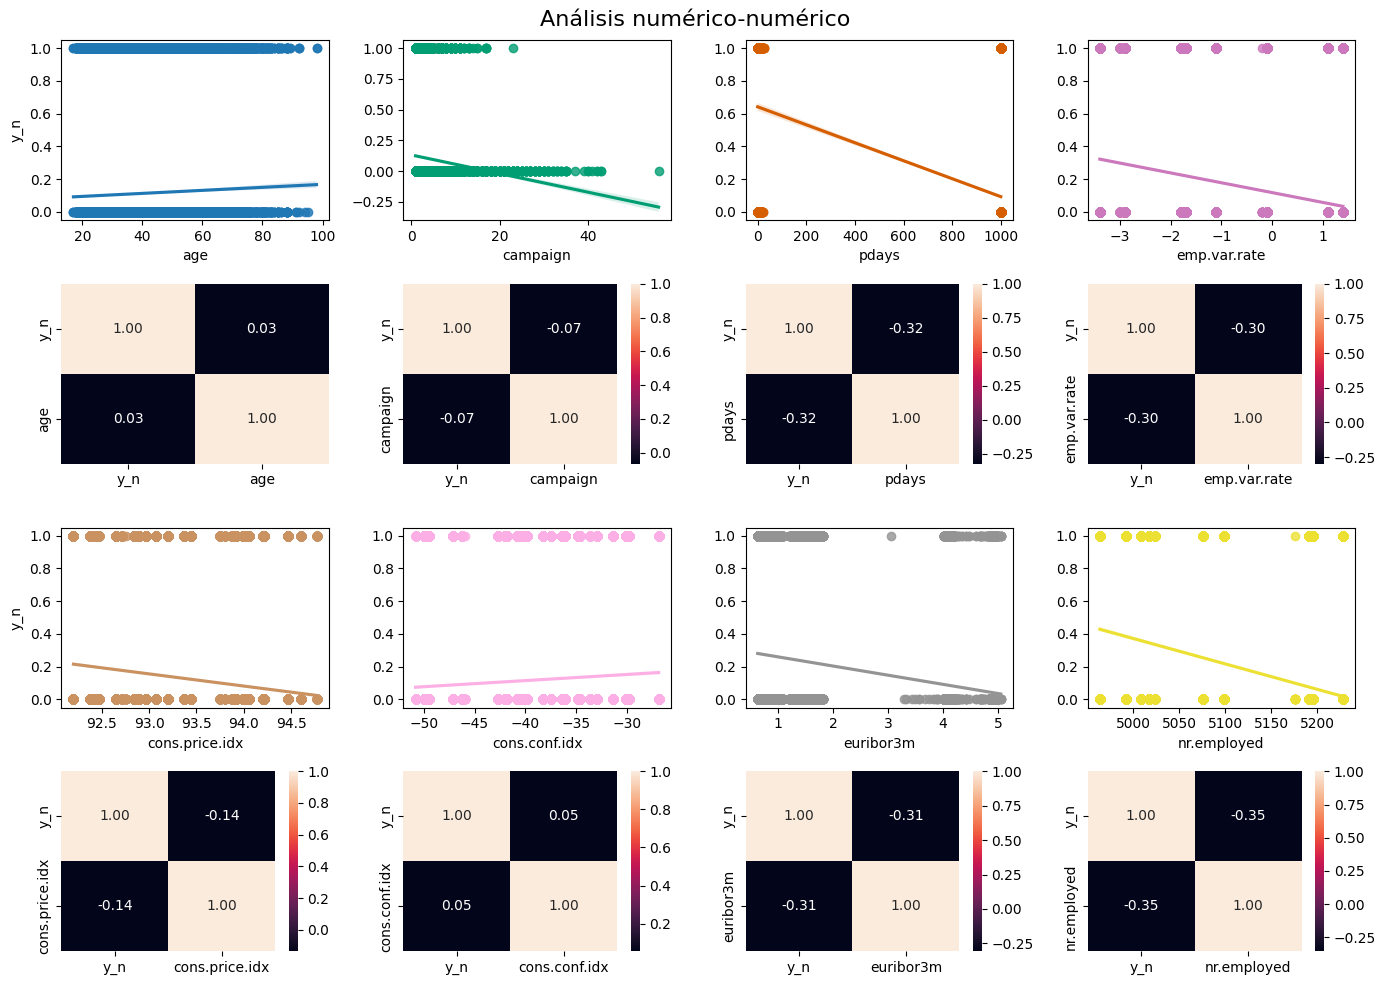

In [20]:
#Analisis de varias variables pt.2

fig, axis = plt.subplots(4, 4, figsize = (14, 10))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "y_n")
sns.heatmap(total_data[["y_n", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "campaign", y = "y_n", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(total_data[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_data, x = "pdays", y = "y_n", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(total_data[["y_n", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = total_data, x = "emp.var.rate", y = "y_n", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(total_data[["y_n", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = total_data, x = "cons.price.idx", y = "y_n", color=sns.color_palette("colorblind")[5])
sns.heatmap(total_data[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_data, x = "cons.conf.idx", y = "y_n", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(total_data[["y_n", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = total_data, x = "euribor3m", y = "y_n", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(total_data[["y_n", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 3], data = total_data, x = "nr.employed", y = "y_n", color=sns.color_palette("colorblind")[8]).set(ylabel = None)
sns.heatmap(total_data[["y_n", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3]).set(ylabel = None)

plt.tight_layout()

plt.show()

#Análisis

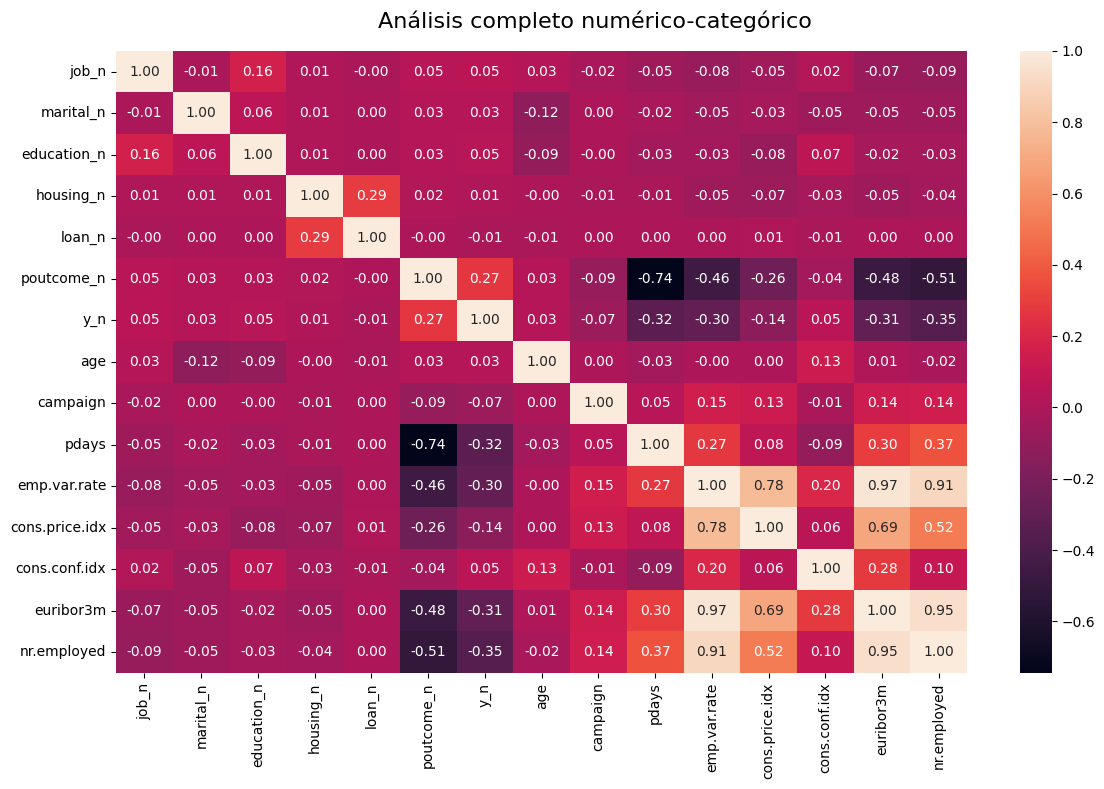

In [21]:
#Análisis combinado

fig, axis = plt.subplots(figsize = (12, 8))
fig.suptitle("Análisis completo numérico-categórico", fontsize=16)

sns.heatmap(total_data[["job_n", "marital_n", "education_n", "housing_n", "loan_n", "poutcome_n", "y_n", "age", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

#Analisis

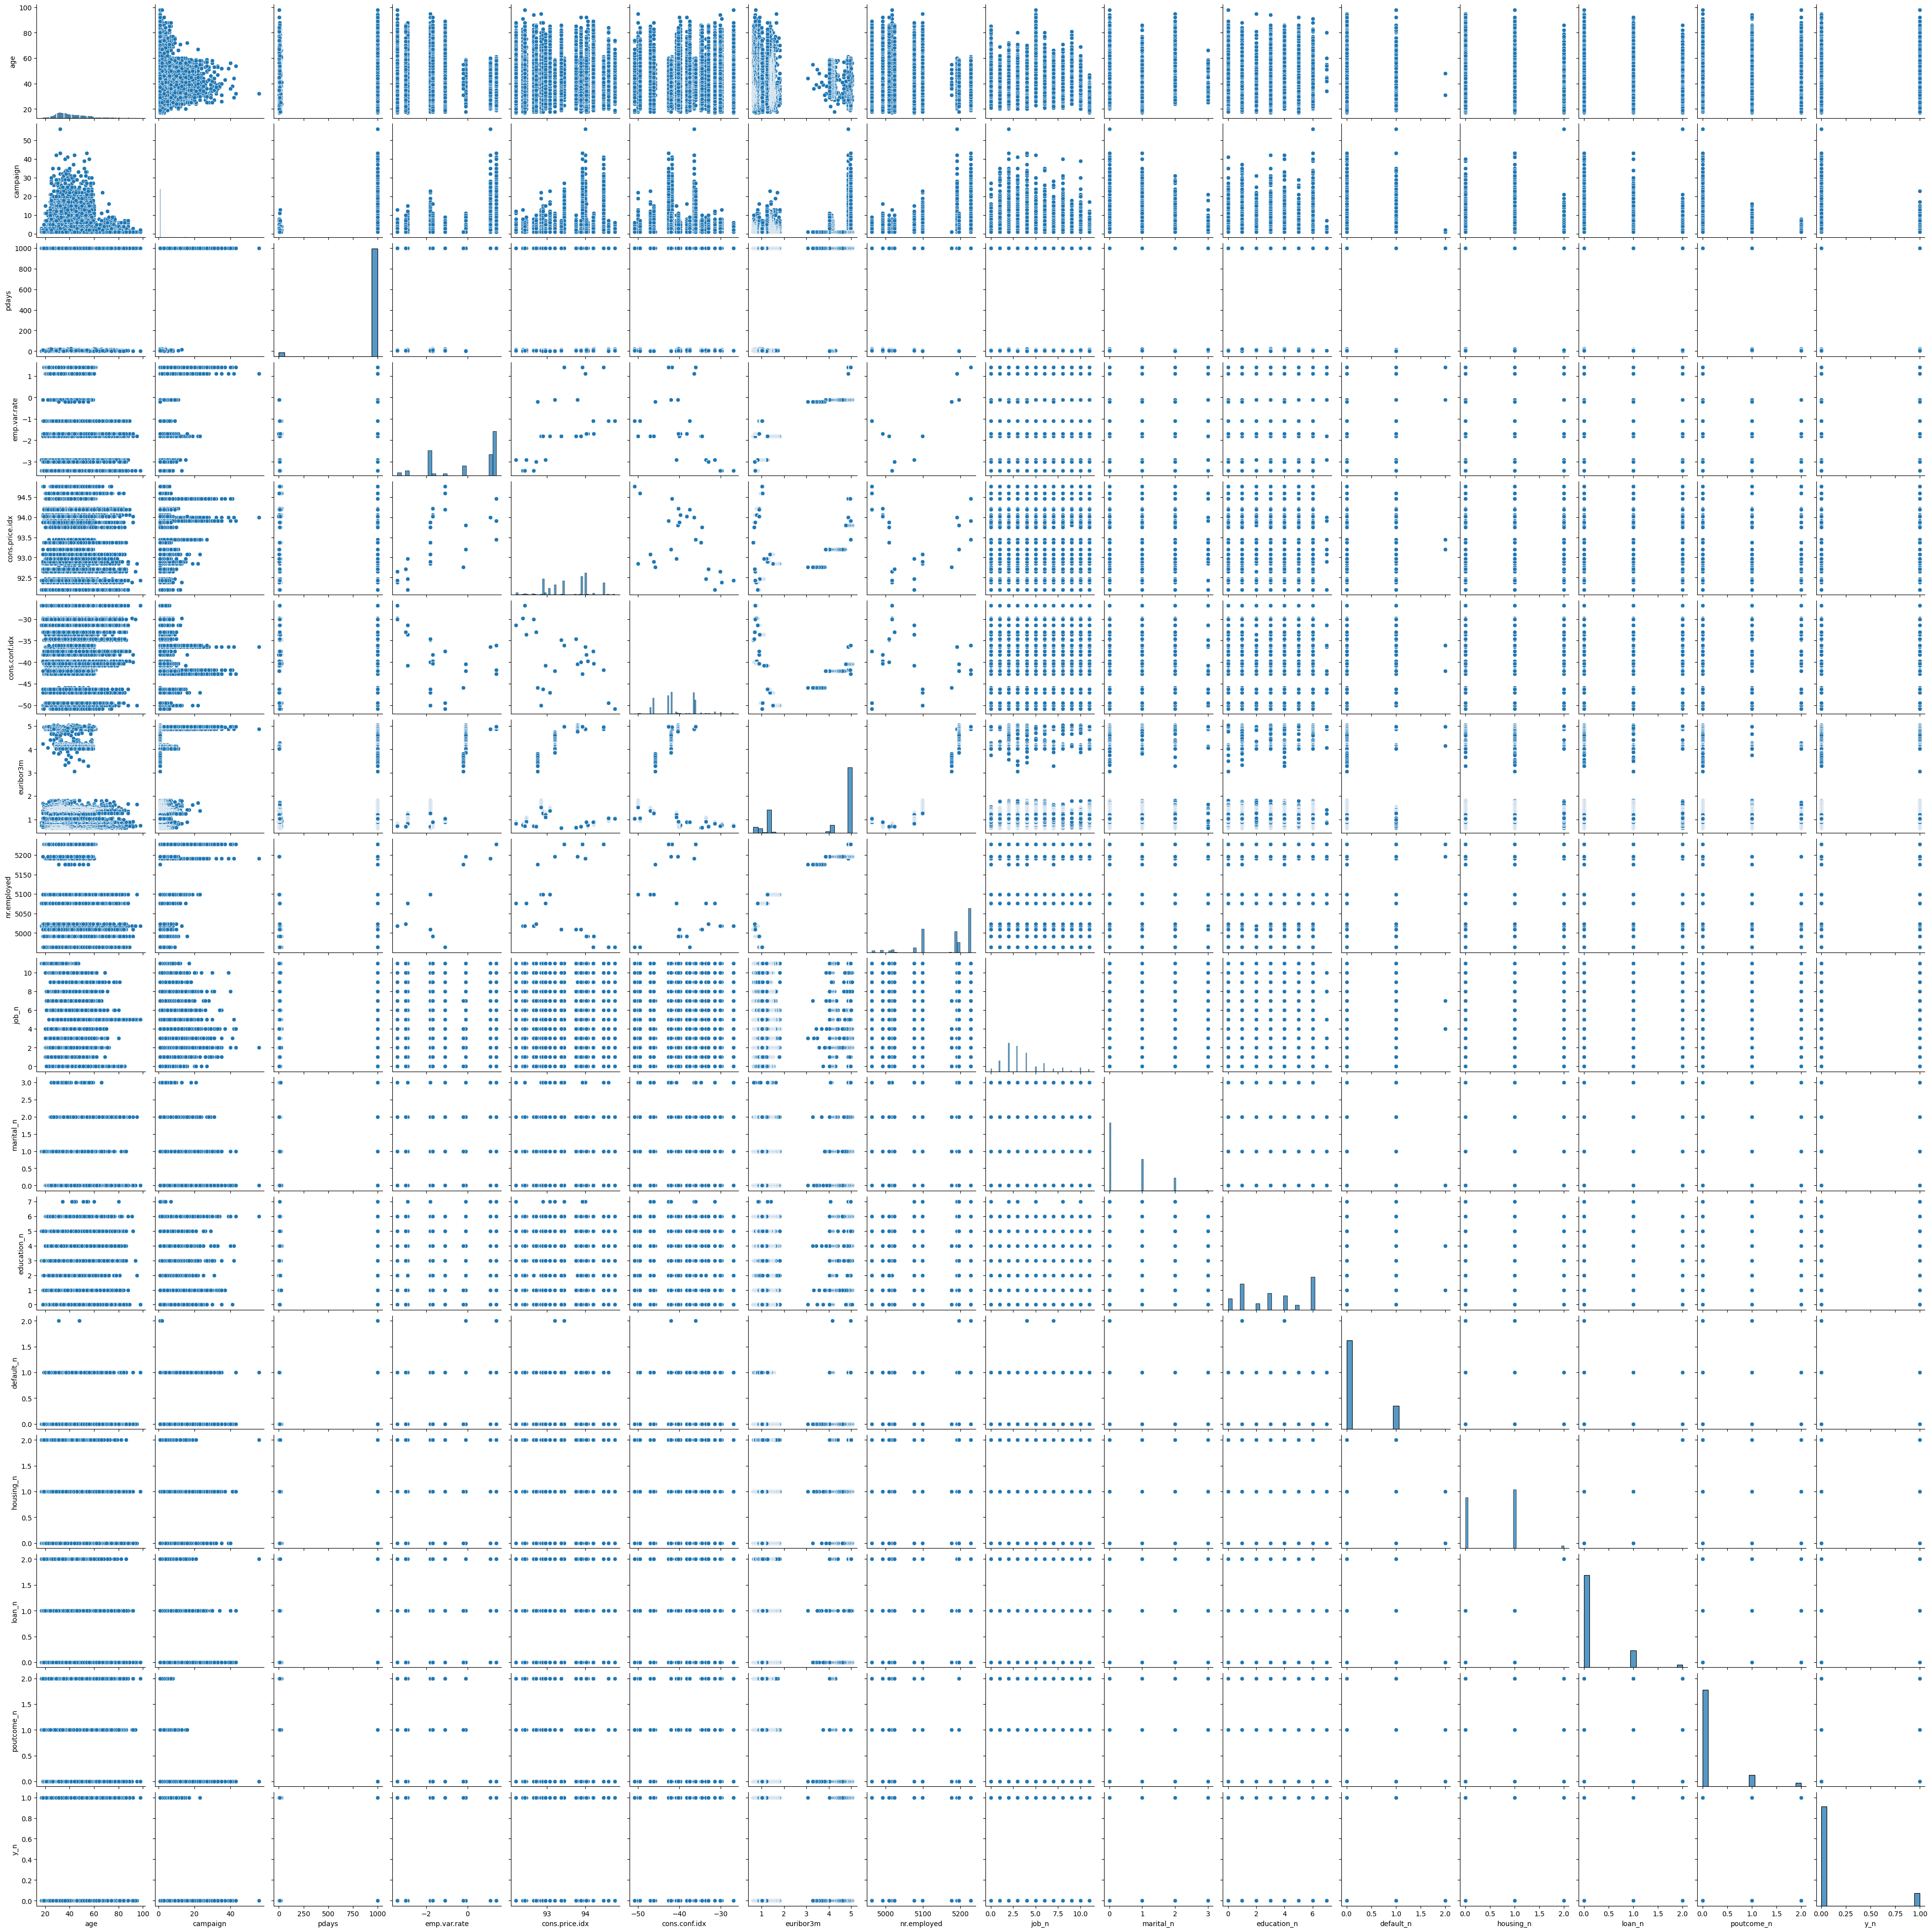

In [15]:
fig.suptitle("Análisis de todos los datos", fontsize=16)
sns.pairplot(data = total_data)

In [25]:
#Análisis de outliers
total_data.describe()

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.081922,93.575720,-40.502863,3.621293,5167.034870,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.169953,0.112663
std,10.42068,2.770318,186.937102,1.570883,0.578839,4.627860,1.734437,72.251364,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.455811,0.316184
min,17.00000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000


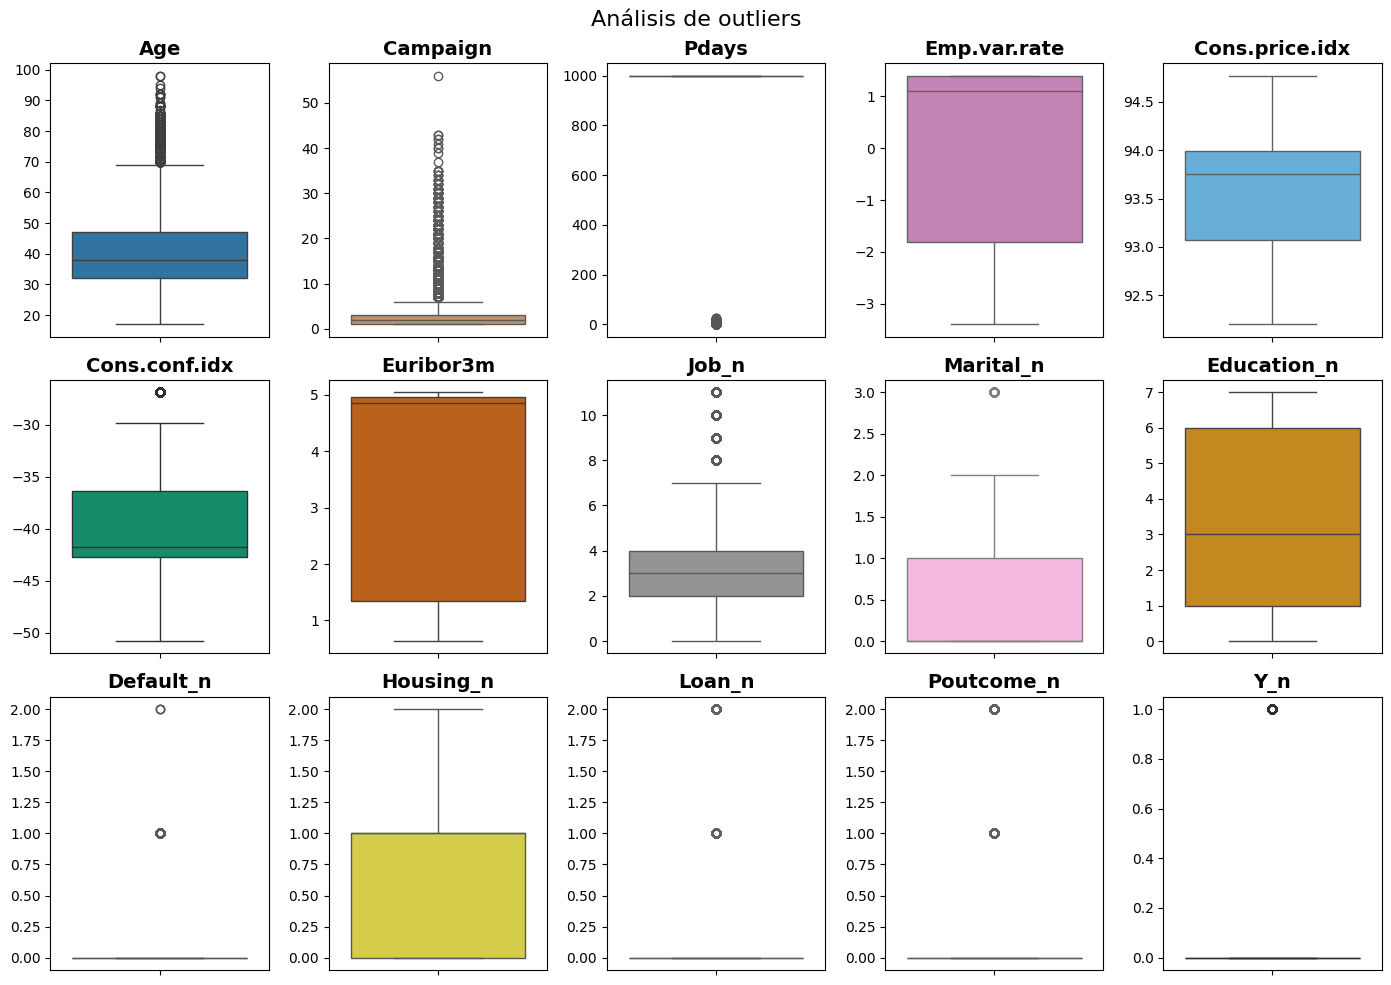

In [27]:
fig, axes = plt.subplots(3, 5, figsize = (14, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = total_data, y = "age").set_title("Age", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = total_data, y = "campaign", color=sns.color_palette("colorblind")[5]).set_title("Campaign", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = total_data, y = "pdays").set_title("Pdays", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = total_data, y = "emp.var.rate", color=sns.color_palette("colorblind")[4]).set_title("Emp.var.rate", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 4], data = total_data, y = "cons.price.idx", color=sns.color_palette("colorblind")[9]).set_title("Cons.price.idx", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = total_data, y = "cons.conf.idx", color=sns.color_palette("colorblind")[2]).set_title("Cons.conf.idx", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = total_data, y = "euribor3m", color=sns.color_palette("colorblind")[3]).set_title("Euribor3m", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = total_data, y = "job_n", color=sns.color_palette("colorblind")[7]).set_title("Job_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 3], data = total_data, y = "marital_n", color=sns.color_palette("colorblind")[6]).set_title("Marital_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 4], data = total_data, y = "education_n", color=sns.color_palette("colorblind")[1]).set_title("Education_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 0], data = total_data, y = "default_n",).set_title("Default_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 1], data = total_data, y = "housing_n", color=sns.color_palette("colorblind")[8]).set_title("Housing_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 2], data = total_data, y = "loan_n").set_title("Loan_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 3], data = total_data, y = "poutcome_n").set_title("Poutcome_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 4], data = total_data, y = "y_n").set_title("Y_n", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

plt.tight_layout()

plt.show()

#Analisis

In [28]:
#Creamos una copia con y otra sin outliers

total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

In [31]:
#Detectar outliers de la columna Age
age_stats = total_data["age"].describe()
age_stats

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [32]:
#Obtenemos los IQR de Age

age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(age_iqr, 2)}.")

Los límites upper y lower son 69.5 y 9.5, el rango de intercuartiles es de 15.0.


In [33]:
#Limpiamos los outliers y lo comprobamos 

total_data = total_data[total_data["age"] > 0]

count_0 = total_data[total_data["age"] == 0].shape[0]
count_1 = total_data[total_data["age"] == 1].shape[0]

print("Resultados de 0: ", count_0)
print("Resultados de 1: ", count_1)

Resultados de 0:  0
Resultados de 1:  0


In [34]:
#Detectar outliers de la columna Campaign

campaign_stats = total_data["campaign"].describe()
campaign_stats

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [35]:
#Obtenemos los IQR de Campaign

campaign_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_stats["25%"] - 1.5 * campaign_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(campaign_iqr, 2)}.")

Los límites upper y lower son 6.0 y -2.0, el rango de intercuartiles es de 2.0.


In [37]:
#Limpiamos los outliers y lo comprobamos 

total_data = total_data[total_data["campaign"] > 0]

count_0 = total_data[total_data["campaign"] == 0].shape[0]
count_1 = total_data[total_data["campaign"] == 1].shape[0]
count_2 = total_data[total_data["campaign"] == 2].shape[0]

print("Resultados de 0: ", count_0)
print("Resultados de 1: ", count_1)
print("Resultados de 2: ", count_2)

Resultados de 0:  0
Resultados de 1:  17634
Resultados de 2:  10568


In [38]:
#Detectar outliers de la columna Pdays

pdays_stats = total_data["pdays"].describe()
pdays_stats

count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [39]:
#Obtenemos los IQR de Pdays

pdays_iqr = pdays_stats["75%"] - pdays_stats["25%"]
upper_limit = pdays_stats["75%"] + 1.5 * pdays_iqr
lower_limit = pdays_stats["25%"] - 1.5 * pdays_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(pdays_iqr, 2)}.")

Los límites upper y lower son 999.0 y 999.0, el rango de intercuartiles es de 0.0.


In [40]:
#Limpiamos los outliers y lo comprobamos 

total_data = total_data[total_data["pdays"] > 0]

count_0 = total_data[total_data["pdays"] == 0].shape[0]
count_1 = total_data[total_data["pdays"] == 1].shape[0]
count_2 = total_data[total_data["pdays"] == 2].shape[0]

print("Resultados de 0: ", count_0)
print("Resultados de 1: ", count_1)
print("Resultados de 2: ", count_2)

Resultados de 0:  0
Resultados de 1:  26
Resultados de 2:  61


In [41]:
print(total_data.isnull().sum().sort_values(ascending=False))

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
pdays             0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
y_n               0
dtype: int64


In [42]:
#Análisis de los valores faltantes
print(total_data.isnull().sum().sort_values(ascending=False) / len(total_data))

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
campaign          0.0
pdays             0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
job_n             0.0
marital_n         0.0
education_n       0.0
default_n         0.0
housing_n         0.0
loan_n            0.0
poutcome_n        0.0
y_n               0.0
dtype: float64


In [43]:
#Rellenamos los valores faltantes

total_data["cons.conf.idx"].fillna(total_data["cons.conf.idx"].mean(), inplace = True)
total_data["job_n"].fillna(total_data["job_n"].mean(), inplace = True)
total_data["marital_n"].fillna(total_data["marital_n"].mean(), inplace = True)
total_data["default_n"].fillna(total_data["default_n"].mean(), inplace = True)
total_data["loan_n"].fillna(total_data["loan_n"].mean(), inplace = True)
total_data["poutcome_n"].fillna(total_data["poutcome_n"].mean(), inplace = True)
total_data["y_n"].fillna(total_data["y_n"].mean(), inplace = True)

total_data["age"].fillna(total_data["age"].median(), inplace = True)
total_data["campaign"].fillna(total_data["campaign"].median(), inplace = True)
total_data["pdays"].fillna(total_data["pdays"].median(), inplace = True)

total_data["job"].fillna(total_data["job"].mode()[0], inplace = True)
total_data["marital"].fillna(total_data["marital"].mode()[0], inplace = True)
total_data["education"].fillna(total_data["education"].mode()[0], inplace = True)
total_data["default"].fillna(total_data["default"].mode()[0], inplace = True)
total_data["housing"].fillna(total_data["housing"].mode()[0], inplace = True)
total_data["loan"].fillna(total_data["loan"].mode()[0], inplace = True)
total_data["poutcome"].fillna(total_data["poutcome"].mode()[0], inplace = True)
total_data["emp.var.rate"].fillna(total_data["emp.var.rate"].mode()[0], inplace = True)
total_data["cons.price.idx"].fillna(total_data["cons.price.idx"].mode()[0], inplace = True)
total_data["euribor3m"].fillna(total_data["euribor3m"].mode()[0], inplace = True)
total_data["y"].fillna(total_data["y"].mode()[0], inplace = True)
total_data["education_n"].fillna(total_data["education_n"].mode()[0], inplace = True)
total_data["housing_n"].fillna(total_data["housing_n"].mode()[0], inplace = True)

total_data.isnull().sum()

/tmp/ipykernel_685/28340304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data["cons.conf.idx"].fillna(total_data["cons.conf.idx"].mean(), inplace = True)
/tmp/ipykernel_685/28340304.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
pdays             0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
y_n               0
dtype: int64

In [45]:
#Feature scaling

from sklearn.model_selection import train_test_split

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "poutcome_n", "age", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

X_con_outliers = total_data_con_outliers.drop("y_n", axis = 1)[num_variables]
y_con_outliers = total_data_con_outliers["y_n"]
X_sin_outliers = total_data_sin_outliers.drop("y_n", axis = 1)[num_variables]
y_sin_outliers = total_data_sin_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train_con_outliers, y_test_con_outliers = train_test_split(X_con_outliers, y_con_outliers, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers, y_train_sin_outliers, y_test_sin_outliers = train_test_split(X_sin_outliers, y_sin_outliers, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()
X_train_sin_outliers.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12346,10,0,2,0,1,1,0,29,3,999,1.4,93.918,-42.7,4.959,5228.1
8564,2,1,6,0,0,0,0,50,6,999,1.4,94.465,-41.8,4.864,5228.1
21417,2,1,6,0,0,0,0,29,4,999,1.4,93.444,-36.1,4.963,5228.1
3315,2,1,6,0,0,0,0,35,1,999,1.1,93.994,-36.4,4.860,5191.0
33236,3,1,1,1,0,0,0,40,1,999,-1.8,92.893,-46.2,1.291,5099.1


In [46]:
y_train_con_outliers.head()
y_train_sin_outliers.head()

12346    0
8564     0
21417    0
3315     0
33236    0
Name: y_n, dtype: int64

In [47]:
#Normalización
from sklearn.preprocessing import StandardScaler
from pickle import dump

#Con outliers
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=num_variables)

dump(scaler_con_outliers, open("scaler_con_outliers.sav", "wb"))

# Sin outliers
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=num_variables)

dump(scaler_sin_outliers, open("scaler_sin_outliers.sav", "wb"))

In [48]:
#Imprimimos los resultados

X_train_con_outliers_norm.head()
X_test_con_outliers_norm.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36254,0.550645,-0.734095,0.333040,-0.511455,0.788248,1.750366,-0.371649,1.817564,-0.566100,0.195697,-1.900745,-1.060690,-0.060187,-1.358395,-1.255426
32662,-0.269237,-0.734095,-0.124648,-0.511455,-1.060840,-0.440002,1.824642,-0.579095,-0.566100,0.195697,-1.199927,-1.181648,-1.227566,-1.339365,-0.939011
40860,0.140704,-0.734095,0.333040,-0.511455,0.788248,-0.440002,-0.371649,-0.770828,-0.206973,0.195697,-0.753952,1.769746,-1.940965,-1.535429,-2.811247
32897,-0.679177,-0.734095,-1.040024,-0.511455,0.788248,1.750366,1.824642,1.242366,-0.206973,0.195697,-1.199927,-1.181648,-1.227566,-1.339365,-0.939011
16461,-1.089118,0.698859,-0.124648,-0.511455,0.788248,-0.440002,-0.371649,-1.537759,-0.566100,0.195697,0.838815,0.589534,-0.470932,0.773502,0.843413


In [49]:
X_train_sin_outliers_norm.head()
X_test_sin_outliers_norm.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36254,0.550645,-0.734095,0.333040,-0.511455,0.788248,1.750366,-0.371649,1.817564,-0.566100,0.195697,-1.900745,-1.060690,-0.060187,-1.358395,-1.255426
32662,-0.269237,-0.734095,-0.124648,-0.511455,-1.060840,-0.440002,1.824642,-0.579095,-0.566100,0.195697,-1.199927,-1.181648,-1.227566,-1.339365,-0.939011
40860,0.140704,-0.734095,0.333040,-0.511455,0.788248,-0.440002,-0.371649,-0.770828,-0.206973,0.195697,-0.753952,1.769746,-1.940965,-1.535429,-2.811247
32897,-0.679177,-0.734095,-1.040024,-0.511455,0.788248,1.750366,1.824642,1.242366,-0.206973,0.195697,-1.199927,-1.181648,-1.227566,-1.339365,-0.939011
16461,-1.089118,0.698859,-0.124648,-0.511455,0.788248,-0.440002,-0.371649,-1.537759,-0.566100,0.195697,0.838815,0.589534,-0.470932,0.773502,0.843413


In [50]:
#Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

# Escalado con outliers
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index=X_train_con_outliers.index, columns=num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index=X_test_con_outliers.index, columns=num_variables)


# Escalado sin outliers
scaler_no_outliers = MinMaxScaler()
scaler_no_outliers.fit(X_train_sin_outliers)

X_train_no_outliers_scal = scaler_no_outliers.transform(X_train_sin_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index=X_train_sin_outliers.index, columns=num_variables)

X_test_no_outliers_scal = scaler_no_outliers.transform(X_test_sin_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index=X_test_sin_outliers.index, columns=num_variables)

In [51]:
#Imprimimos los resultados

X_train_con_outliers_scal.head()
X_test_con_outliers_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36254,0.454545,0.000000,0.571429,0.0,0.5,0.5,0.0,0.518519,0.000000,1.0,0.104167,0.296960,0.418410,0.143278,0.425709
32662,0.272727,0.000000,0.428571,0.0,0.0,0.0,0.5,0.209877,0.000000,1.0,0.333333,0.269680,0.192469,0.150759,0.512287
40860,0.363636,0.000000,0.571429,0.0,0.5,0.0,0.0,0.185185,0.018182,1.0,0.479167,0.935308,0.054393,0.073679,0.000000
32897,0.181818,0.000000,0.142857,0.0,0.5,0.5,0.5,0.444444,0.018182,1.0,0.333333,0.269680,0.192469,0.150759,0.512287
16461,0.090909,0.333333,0.428571,0.0,0.5,0.0,0.0,0.086420,0.000000,1.0,1.000000,0.669135,0.338912,0.981410,1.000000


In [52]:
X_train_no_outliers_scal.head()
X_test_no_outliers_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36254,0.454545,0.000000,0.571429,0.0,0.5,0.5,0.0,0.518519,0.000000,1.0,0.104167,0.296960,0.418410,0.143278,0.425709
32662,0.272727,0.000000,0.428571,0.0,0.0,0.0,0.5,0.209877,0.000000,1.0,0.333333,0.269680,0.192469,0.150759,0.512287
40860,0.363636,0.000000,0.571429,0.0,0.5,0.0,0.0,0.185185,0.018182,1.0,0.479167,0.935308,0.054393,0.073679,0.000000
32897,0.181818,0.000000,0.142857,0.0,0.5,0.5,0.5,0.444444,0.018182,1.0,0.333333,0.269680,0.192469,0.150759,0.512287
16461,0.090909,0.333333,0.428571,0.0,0.5,0.0,0.0,0.086420,0.000000,1.0,1.000000,0.669135,0.338912,0.981410,1.000000


In [53]:
from sklearn.feature_selection import f_classif, SelectKBest

#Con outliers
selection_model_con = SelectKBest(f_classif, k = 7)
selection_model_con.fit(X_train_con_outliers, y_train_con_outliers)
column_names = selection_model_con.get_support()
X_train_sel_con = pd.DataFrame(selection_model_con.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[column_names])
X_test_sel_con = pd.DataFrame(selection_model_con.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[column_names])
dump(selection_model_con, open("selection_model_con_outliers.sav", "wb"))

X_train_sel_con_norm = X_train_con_outliers_norm[X_train_sel_con.columns]
X_train_sel_con_scal = X_train_con_outliers_scal[X_train_sel_con.columns]

X_test_sel_con_norm = X_test_con_outliers_norm[X_test_sel_con.columns]
X_test_sel_con_scal = X_test_con_outliers_scal[X_test_sel_con.columns]

#Sin outliers
selection_model_con = SelectKBest(f_classif, k = 7)
selection_model_con.fit(X_train_sin_outliers, y_train_sin_outliers)
column_names = selection_model_con.get_support()
X_train_sel_con = pd.DataFrame(selection_model_con.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[column_names])
X_test_sel_con = pd.DataFrame(selection_model_con.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[column_names])
dump(selection_model_con, open("selection_model_con_outliers.sav", "wb"))

X_train_sel_sin_norm = X_train_sin_outliers_norm[X_train_sel_con.columns]
X_train_sel_sin_scal = X_train_no_outliers_scal[X_train_sel_con.columns]

X_test_sel_sin_norm = X_test_sin_outliers_norm[X_test_sel_con.columns]
X_test_sel_sin_scal = X_test_no_outliers_scal[X_test_sel_con.columns]

In [64]:
#Imprimimos los resultados de entrenamiento con outliers

X_train_sel_con_norm.head()
X_train_sel_con_scal.head()

,default_n,poutcome_n,pdays,emp.var.rate,cons.price.idx,euribor3m,nr.employed,price
12346,0.0,0.0,1.0,1.000000,0.669135,0.980503,1.000000,0
8564,0.0,0.0,1.0,1.000000,0.882307,0.958966,1.000000,0
21417,0.0,0.0,1.0,1.000000,0.484412,0.981410,1.000000,0
3315,0.0,0.0,1.0,0.937500,0.698753,0.958059,0.859735,0
33236,0.5,0.0,1.0,0.333333,0.269680,0.148946,0.512287,0


In [65]:
#Imprimimos los resultados de evaluación con outliers

X_test_sel_con_norm.head()
X_test_sel_con_scal.head()

,default_n,poutcome_n,pdays,emp.var.rate,cons.price.idx,euribor3m,nr.employed,price
36254,0.0,0.0,1.0,0.104167,0.296960,0.143278,0.425709,1
32662,0.0,0.5,1.0,0.333333,0.269680,0.150759,0.512287,0
40860,0.0,0.0,1.0,0.479167,0.935308,0.073679,0.000000,1
32897,0.0,0.5,1.0,0.333333,0.269680,0.150759,0.512287,0
16461,0.0,0.0,1.0,1.000000,0.669135,0.981410,1.000000,0


In [66]:
#Imprimimos los resultados de entrenamiento sin outliers
X_train_sel_sin_norm.head()
X_train_sel_sin_scal.head()

,default_n,poutcome_n,pdays,emp.var.rate,cons.price.idx,euribor3m,nr.employed,price
12346,0.0,0.0,1.0,1.000000,0.669135,0.980503,1.000000,0
8564,0.0,0.0,1.0,1.000000,0.882307,0.958966,1.000000,0
21417,0.0,0.0,1.0,1.000000,0.484412,0.981410,1.000000,0
3315,0.0,0.0,1.0,0.937500,0.698753,0.958059,0.859735,0
33236,0.5,0.0,1.0,0.333333,0.269680,0.148946,0.512287,0


In [67]:
#Imprimimos los resultados de evaluación sin outliers
X_test_sel_sin_norm.head()
X_test_sel_sin_scal.head()

,default_n,poutcome_n,pdays,emp.var.rate,cons.price.idx,euribor3m,nr.employed,price
36254,0.0,0.0,1.0,0.104167,0.296960,0.143278,0.425709,1
32662,0.0,0.5,1.0,0.333333,0.269680,0.150759,0.512287,0
40860,0.0,0.0,1.0,0.479167,0.935308,0.073679,0.000000,1
32897,0.0,0.5,1.0,0.333333,0.269680,0.150759,0.512287,0
16461,0.0,0.0,1.0,1.000000,0.669135,0.981410,1.000000,0


In [68]:
X_train_sel_con_norm["y_n"] = list(y_train_con_outliers)
X_test_sel_con_norm["y_n"] = list(y_test_con_outliers)

/tmp/ipykernel_685/2383537454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel_con_norm["y_n"] = list(y_train_con_outliers)
/tmp/ipykernel_685/2383537454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel_con_norm["y_n"] = list(y_test_con_outliers)


In [69]:
X_train_sel_con_scal["y_n"] = list(y_train_con_outliers)
X_test_sel_con_scal["y_n"] = list(y_test_con_outliers)

/tmp/ipykernel_685/3551148928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel_con_scal["y_n"] = list(y_train_con_outliers)
/tmp/ipykernel_685/3551148928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel_con_scal["y_n"] = list(y_test_con_outliers)


In [70]:
X_train_sel_sin_norm["y_n"] = list(y_train_sin_outliers)
X_test_sel_sin_norm["y_n"] = list(y_test_sin_outliers) 

/tmp/ipykernel_685/2541304403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel_sin_norm["y_n"] = list(y_train_sin_outliers)
/tmp/ipykernel_685/2541304403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel_sin_norm["y_n"] = list(y_test_sin_outliers)


In [71]:
X_train_sel_sin_scal["y_n"] = list(y_train_sin_outliers)  
X_test_sel_sin_scal["y_n"] = list(y_test_sin_outliers) 

/tmp/ipykernel_685/1419594167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel_sin_scal["y_n"] = list(y_train_sin_outliers)
/tmp/ipykernel_685/1419594167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel_sin_scal["y_n"] = list(y_test_sin_outliers)


In [72]:
#Guardamos los datos originales con outliers
X_train_con_outliers.to_csv("../data/processed/clean_train_orig_con.csv", index = False)
X_test_con_outliers.to_csv("../data/processed/clean_test_orig_con.csv", index = False)

In [73]:
#Guardamos los datos originales sin outliers
X_train_sin_outliers.to_csv("../data/processed/clean_train_orig_sin.csv", index = False)
X_test_sin_outliers.to_csv("../data/processed/clean_test_orig_sin.csv", index = False)

In [74]:
#Guardamos los datos normalizados con outliers
X_train_sel_con_norm.to_csv("../data/processed/clean_train_norm_con.csv", index = False)
X_test_sel_con_norm.to_csv("../data/processed/clean_test_norm_con.csv", index = False)

In [75]:
#Guardamos los datos normalizados sin outliers
X_train_sel_sin_norm.to_csv("../data/processed/clean_train_norm_sin.csv", index = False)
X_test_sel_sin_norm.to_csv("../data/processed/clean_test_norm_sin.csv", index = False)

In [76]:
#Guardamos los datos escalados con outliers
X_train_sel_con_scal.to_csv("../data/processed/clean_train_scal_con.csv", index = False)
X_test_sel_con_scal.to_csv("../data/processed/clean_test_scal_con.csv", index = False)

In [77]:
#Guardamos los datos escalados sin outliers
X_train_sel_sin_scal.to_csv("../data/processed/clean_train_scal_sin.csv", index = False)
X_test_sel_sin_scal.to_csv("../data/processed/clean_test_scal_sin.csv", index = False)

In [78]:
#Guardamos los datos y de entrenamiento y test
y_train_con_outliers.to_csv("../data/processed/clean_train_y.csv", index = False)
y_test_con_outliers.to_csv("../data/processed/clean_test_y.csv", index = False)
